# 优化目标函数

In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [3]:
def rosen_der(x):
    #jacbion矩阵（导数矩阵）
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [4]:
def rosen_hess(x):
    #hessian矩阵
    #返回对象是个二维数组
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [5]:
def rosen_hess_p(x, p):
    #H*p的矩阵
    #返回对象是个一维数组
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] \
               -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp

In [6]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 33
         Hessian evaluations: 24


array([1.        , 1.        , 1.        , 0.99999999, 0.99999999])

In [7]:
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 33
         Hessian evaluations: 66


array([1.        , 1.        , 1.        , 0.99999999, 0.99999999])

# 常微分方程

In [9]:
from sympy import *
f = symbols('f', cls=Function)
x = symbols('x')
eq = Eq(f(x).diff(x,1)+f(x)+f(x)**2, 0)
print(dsolve(eq, f(x)))
C1 = symbols('C1')
eqr = -C1/(C1 - exp(x))
eqr1 = eqr.subs(x, 0)
print(solveset(eqr1 - 1, C1))
eqr2 = eqr.subs(C1, 1/2)

Eq(f(x), -C1/(C1 - exp(x)))
FiniteSet(1/2)


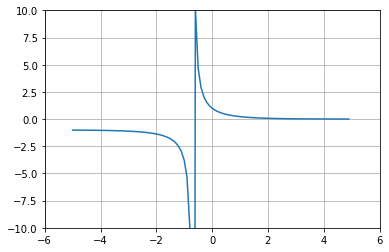

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x_1 = np.arange(-5, 5, 0.1)
y_1 = [-0.5/(0.5 - exp(x)) for x in x_1]
plt.plot(x_1, y_1)
plt.axis([-6,6,-10,10])
plt.grid()
plt.show()